This notebook contains a collection of goodness-of-fit tests

In [1]:
import arviz as az
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import pandas as pd
import pymc3 as pm
from tqdm import tqdm
from sklearn.metrics import *
import theano.tensor as tt
import scipy
import scipy.stats as stats
import seaborn as sns
sns.set(style="darkgrid")

import rasterio as rio
from rasterio import mask
import geopandas as gpd
from shapely.geometry import shape
import xarray as xr
import rioxarray
import fiona

import optuna
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import train_test_split

tqdm.pandas()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
from models import *

balancing...
repairs: 7.6567198704603285%, non-repairs: 92.34328012953968%
processing soil hydraulic data...
acquiring housing information...
processing DEM and flow information...
Fitting 1-layer hierarchical Bayesian models...
fitting water model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, ppt, wtr_dist, sigma_c, mu_c, ppt_sig, ppt_mu, wtr_beta, wtr_alpha]


Sampling 4 chains for 350 tune and 500 draw iterations (1_400 + 2_000 draws total) took 26 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


fitting water distance model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, wtr_dist, sigma_c, mu_c, wtr_beta, wtr_alpha]


Sampling 4 chains for 350 tune and 500 draw iterations (1_400 + 2_000 draws total) took 17 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


fitting precipitation model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, ppt, sigma_c, mu_c, ppt_sig, ppt_mu]


Sampling 4 chains for 350 tune and 500 draw iterations (1_400 + 2_000 draws total) took 24 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


fitting soil model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, hydr, ppt, wtr_dist, sigma_c, mu_c, hydr_sig, ppt_sig, ppt_mu, wtr_beta, wtr_alpha]


Sampling 4 chains for 350 tune and 500 draw iterations (1_400 + 2_000 draws total) took 39 seconds.
The acceptance probability does not match the target. It is 0.9343066480932224, but should be close to 0.99. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


fitting socio model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, hse, hydr, ppt, wtr_dist, sigma_c, mu_c, hse_sig, hydr_sig, ppt_sig, ppt_mu, wtr_beta, wtr_alpha]


Sampling 4 chains for 350 tune and 500 draw iterations (1_400 + 2_000 draws total) took 47 seconds.
The acceptance probability does not match the target. It is 0.949868642847136, but should be close to 0.99. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


fitting topo model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, dem, hse, hydr, ppt, wtr_dist, sigma_c, mu_c, dem_beta, dem_alpha, hse_sig, hydr_sig, ppt_sig, ppt_mu, wtr_beta, wtr_alpha]


Sampling 4 chains for 350 tune and 500 draw iterations (1_400 + 2_000 draws total) took 63 seconds.
The acceptance probability does not match the target. It is 0.9444034150482583, but should be close to 0.99. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Fitting pooled Bayesian models...
fitting water model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, ppt, wtr_dist, sigma_c, mu_c, ppt_sig, ppt_mu, wtr_beta, wtr_alpha]


Sampling 4 chains for 350 tune and 500 draw iterations (1_400 + 2_000 draws total) took 8 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9626513454115264, but should be close to 0.99. Try to increase the number of tuning steps.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9529650760158113, but should be close to 0.99. Try to increase the number of tuning steps.
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


fitting water distance model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, wtr_dist, sigma_c, mu_c, wtr_beta, wtr_alpha]


Sampling 4 chains for 200 tune and 500 draw iterations (800 + 2_000 draws total) took 4 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 76 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7948635008675426, but should be close to 0.99. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


fitting precipitation model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, ppt, sigma_c, mu_c, ppt_sig, ppt_mu]


Sampling 4 chains for 350 tune and 500 draw iterations (1_400 + 2_000 draws total) took 7 seconds.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9631347323630798, but should be close to 0.99. Try to increase the number of tuning steps.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.


fitting soil model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, hydr, ppt, wtr_dist, sigma_c, mu_c, hydr_sig, ppt_sig, ppt_mu, wtr_beta, wtr_alpha]


Sampling 4 chains for 350 tune and 500 draw iterations (1_400 + 2_000 draws total) took 35 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


fitting socio model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, hse, hydr, ppt, wtr_dist, sigma_c, mu_c, hse_sig, hydr_sig, ppt_sig, ppt_mu, wtr_beta, wtr_alpha]


Sampling 4 chains for 350 tune and 500 draw iterations (1_400 + 2_000 draws total) took 41 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


fitting topo model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, dem, hse, hydr, ppt, wtr_dist, sigma_c, mu_c, dem_beta, dem_alpha, hse_sig, hydr_sig, ppt_sig, ppt_mu, wtr_beta, wtr_alpha]


Sampling 4 chains for 350 tune and 500 draw iterations (1_400 + 2_000 draws total) took 48 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


Fitting 2-level Bayesian models...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, ppt, wtr_dist, sigma_inter_c, mu_inter_c, ppt_sig_c, ppt_mu_c, wtr_beta_c, sigma_inter, mu_inter, ppt_sig, ppt_mu, wtr_beta]


Sampling 4 chains for 350 tune and 500 draw iterations (1_400 + 2_000 draws total) took 71 seconds.
The acceptance probability does not match the target. It is 0.9641184525014087, but should be close to 0.99. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


fitting water distance model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, wtr_dist, sigma_inter_c, mu_inter_c, wtr_beta_c, sigma_inter, mu_inter, wtr_beta]


Sampling 4 chains for 350 tune and 500 draw iterations (1_400 + 2_000 draws total) took 25 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


fitting precipitation model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, ppt, sigma_inter_c, mu_inter_c, ppt_sig_c, ppt_mu_c, sigma_inter, mu_inter, ppt_sig, ppt_mu]


Sampling 4 chains for 350 tune and 500 draw iterations (1_400 + 2_000 draws total) took 28 seconds.
The acceptance probability does not match the target. It is 0.9597318505301964, but should be close to 0.99. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


fitting soil model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, hydr, ppt, wtr_dist, sigma_inter_c, mu_inter_c, hydr_sig_c, ppt_sig_c, ppt_mu_c, wtr_beta_c, sigma_inter, mu_inter, hydr_sig, ppt_sig, ppt_mu, wtr_beta]


Sampling 4 chains for 350 tune and 500 draw iterations (1_400 + 2_000 draws total) took 55 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9231895604482592, but should be close to 0.99. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


fitting socio model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, hse, hydr, ppt, wtr_dist, sigma_inter_c, mu_inter_c, hse_sig_c, hydr_sig_c, ppt_sig_c, ppt_mu_c, wtr_beta_c, sigma_inter, mu_inter, hse_sig, hydr_sig, ppt_sig, ppt_mu, wtr_beta]


Sampling 4 chains for 350 tune and 500 draw iterations (1_400 + 2_000 draws total) took 65 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


fitting topo model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, dem, hse, hydr, ppt, wtr_dist, sigma_inter_c, mu_inter_c, dem_beta_c, hse_sig_c, hydr_sig_c, ppt_sig_c, ppt_mu_c, wtr_beta_c, sigma_inter, mu_inter, dem_beta, hse_sig, hydr_sig, ppt_sig, ppt_mu, wtr_beta]


Sampling 4 chains for 350 tune and 500 draw iterations (1_400 + 2_000 draws total) took 58 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


# Goodness-of-Fit Analyses

In general, GoF tests have the following form: $fit - penalty$ (where lower values mean imply better predictive models)

Where the $fit$ typically measures how uncertain the prediction is to variation in parameters: $log(\frac{1}{N}\sum_{i=1}^NP(y|\hat{\theta_i}))$. If for all $\theta_i$, the probability of predicting y is always 1 (certain), then $log(1) = 0$

Where the $penalty$ typically measures the variance of the fitted posterior: $Var_{i=1}^nlog(P(y|\hat{\theta_i}))$

Models summary:
1. _Water model_: __distance to water bodies, annual maxima precipitation__
2. _Soil model_: distance to water bodies, annual maxima precipitation, __soil hydraulic conductivity__
3. _Socio model_: distance to water bodies, annual maxima precipitation, soil hydraulic conductivity, __median housing value__
4. _Topo model_: distance to water bodies, annual maxima precipitation, soil hydraulic conductivity, median housing value, __flow accumulation, elevation__

## 1. Widely Applicable Information Criterion (WAIC)
$fit = \sum_{i=1}^s-2log(\frac{1}{n}\sum_{j=1}^nP(y_i|\hat{\theta_j}))$ (for all points $s$)

$penalty = \sum_{i=1}^sVar_{j=1}^nlog(P(y_i|\hat{\theta_j}))$ (for all points $s$)

Text(0, 0.5, 'WAIC')

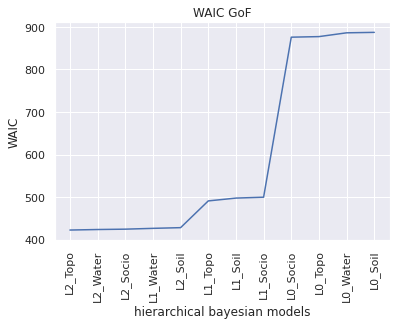

In [3]:
waic_df = pm.compare(traces_dict, ic='WAIC', scale='deviance')
waic_df.reset_index(inplace=True)

# Plot WAIC (lower is better)
ax = waic_df['waic'].plot.line()
ax.set_xticks(range(len(waic_df)))
ax.set_xticklabels(waic_df['index'].values, rotation='vertical')
ax.set_title('WAIC GoF')
ax.set_xlabel('hierarchical bayesian models')
ax.set_ylabel('WAIC')

Text(0, 0.5, 'WAIC relative error (%)')

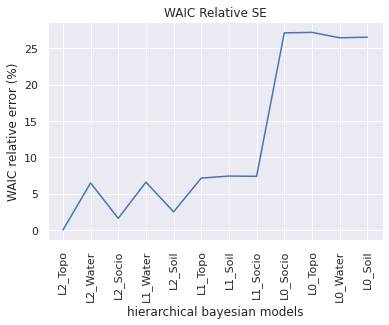

In [4]:
# Plot WAIC relative SE
ax = waic_df['dse'].plot()

ax.set_xticks(range(len(waic_df)))
ax.set_xticklabels(waic_df['index'].values, rotation='vertical')
ax.set_title('WAIC Relative SE')
ax.set_xlabel('hierarchical bayesian models')
ax.set_ylabel('WAIC relative error (%)')

Text(0, 0.5, 'WAIC')

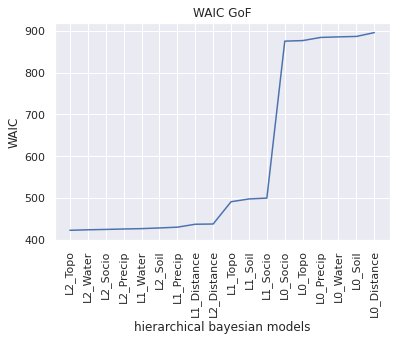

In [5]:
opt_waic_df = pm.compare(opt_traces_dict, ic='WAIC', scale='deviance')
opt_waic_df.reset_index(inplace=True)

# Plot WAIC (lower is better)
ax = opt_waic_df['waic'].plot.line()
ax.set_xticks(range(len(opt_waic_df)))
ax.set_xticklabels(opt_waic_df['index'].values, rotation='vertical')
ax.set_title('WAIC GoF')
ax.set_xlabel('hierarchical bayesian models')
ax.set_ylabel('WAIC')

Text(0, 0.5, 'WAIC relative error (%)')

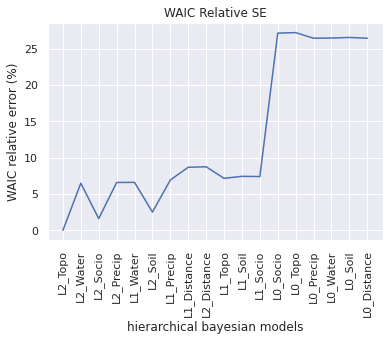

In [6]:
# Plot WAIC relative SE
ax = opt_waic_df['dse'].plot()

ax.set_xticks(range(len(opt_waic_df)))
ax.set_xticklabels(opt_waic_df['index'].values, rotation='vertical')
ax.set_title('WAIC Relative SE')
ax.set_xlabel('hierarchical bayesian models')
ax.set_ylabel('WAIC relative error (%)')

In [115]:
# Prettier graph: sort in the right order TODO: cleaner function to sort
l2_sorter = ['L2_Precip', 'L2_Distance', 'L2_Water', 'L2_Soil', 'L2_Socio', 'L2_Topo']
l2 = opt_waic_df[opt_waic_df['index'].str[:2] == 'L2'].set_index('index')
l2 = l2.loc[l2_sorter]
l2_waic, l2_dse = l2.waic.values, l2.dse.values

l1_sorter = ['L1_Precip', 'L1_Distance', 'L1_Water', 'L1_Soil', 'L1_Socio', 'L1_Topo']
l1 = opt_waic_df[opt_waic_df['index'].str[:2] == 'L1'].set_index('index')
l1 = l1.loc[l1_sorter]
l1_waic, l1_dse = l1.waic.values, l1.dse.values

l0_sorter = ['L0_Precip', 'L0_Distance', 'L0_Water', 'L0_Soil', 'L0_Socio', 'L0_Topo']
l0 = opt_waic_df[opt_waic_df['index'].str[:2] == 'L0'].set_index('index')
l0 = l0.loc[l0_sorter]
l0_waic, l0_dse = l0.waic.values, l0.dse.values

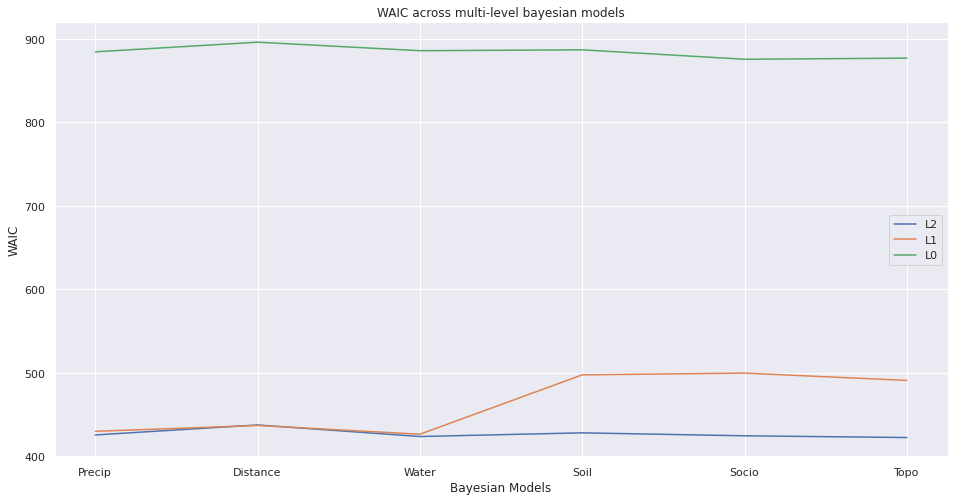

In [117]:
# WAIC
x = ['Precip', 'Distance', 'Water', 'Soil', 'Socio', 'Topo']
f, ax = plt.subplots(figsize=(16,8))
ax.plot(x, l2_waic, label='L2')
ax.plot(x, l1_waic, label='L1')
ax.plot(x, l0_waic, label='L0')
ax.set_title('WAIC across multi-level bayesian models')
ax.set_xlabel('Bayesian Models')
ax.set_ylabel('WAIC')
ax.legend()

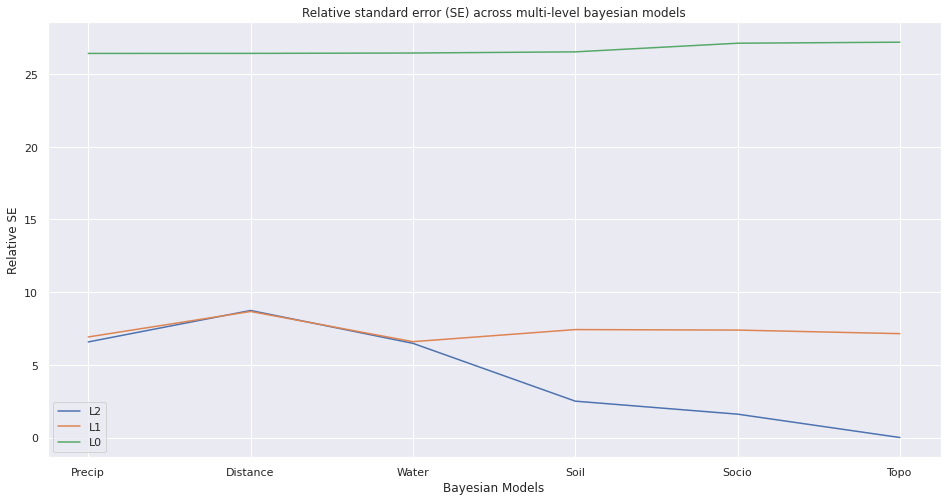

In [118]:
# Uncertainty (dSE)
x = ['Precip', 'Distance', 'Water', 'Soil', 'Socio', 'Topo']
f, ax = plt.subplots(figsize=(16,8))
ax.plot(x, l2_dse, label='L2')
ax.plot(x, l1_dse, label='L1')
ax.plot(x, l0_dse, label='L0')
ax.set_title('Relative standard error (SE) across multi-level bayesian models')
ax.set_xlabel('Bayesian Models')
ax.set_ylabel('Relative SE')
ax.legend()

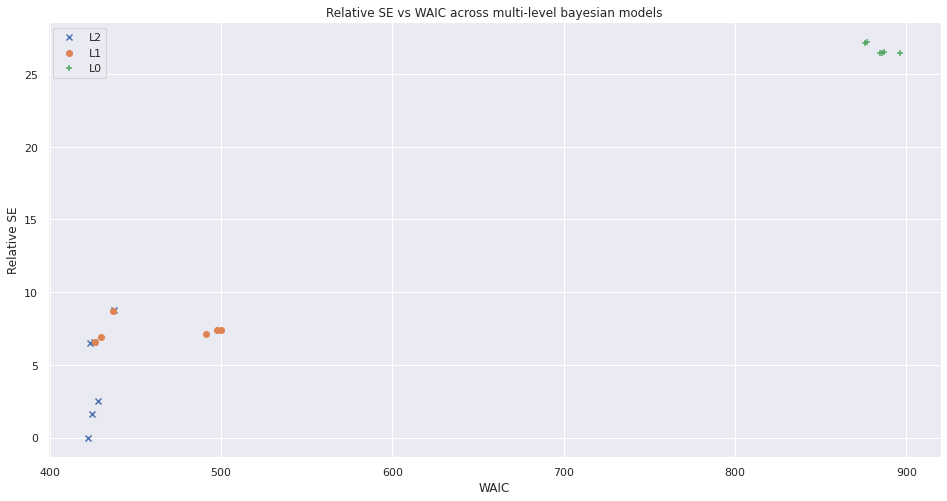

In [119]:
# SE vs WAIC
f, ax = plt.subplots(figsize=(16,8))
ax.scatter(l2_waic, l2_dse, label='L2', marker='x')
ax.scatter(l1_waic, l1_dse, label='L1', marker='o')
ax.scatter(l0_waic, l0_dse, label='L0', marker='+')
ax.set_title('Relative SE vs WAIC across multi-level bayesian models')
ax.set_xlabel('WAIC')
ax.set_ylabel('Relative SE')
ax.legend()

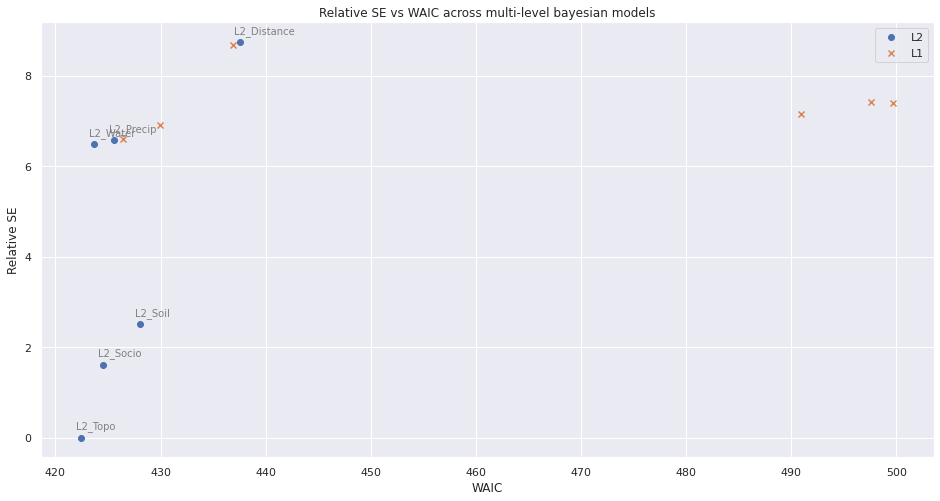

In [120]:
# SE vs WAIC (without l0)
f, ax = plt.subplots(figsize=(16,8))
ax.scatter(l2_waic, l2_dse, label='L2', marker='o')
for i, txt in enumerate(l2.index.values):
    ax.annotate(txt, (l2_waic[i] - 0.5, l2_dse[i] + 0.2), fontsize=10, color='gray')
    
ax.scatter(l1_waic, l1_dse, label='L1', marker='x')
ax.set_title('Relative SE vs WAIC across multi-level bayesian models')
ax.set_xlabel('WAIC')
ax.set_ylabel('Relative SE')
ax.legend()

## 2. Leave-one-out (LOO) Cross Validation
Train model with (n-k) data points, and perform prediction on k data points. Do this multiple times and average the log likelihood (ie. $fit$).  

Text(0, 0.5, 'LOO-CV')

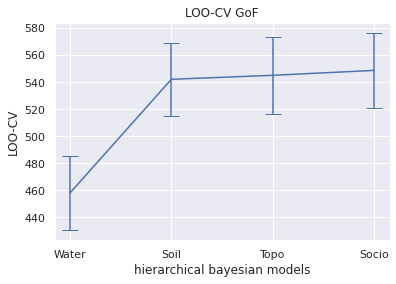

In [6]:
loo_df = pm.compare(traces_dict, ic='LOO', scale='deviance')
loo_df.reset_index(inplace=True)

# Plot LOO-CV (lower is better)
ax = loo_df['loo'].plot.line(yerr=loo_df['se'], capsize=8)
ax.set_xticks(range(len(loo_df)))
ax.set_xticklabels(loo_df['index'].values)
ax.set_title('LOO-CV GoF')
ax.set_xlabel('hierarchical bayesian models')
ax.set_ylabel('LOO-CV')

Text(0, 0.5, 'LOO-CV')

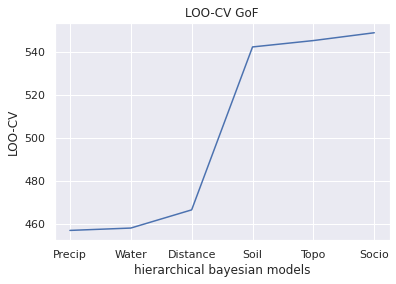

In [21]:
opt_loo_df = pm.compare(opt_traces_dict, ic='LOO', scale='deviance')
opt_loo_df.reset_index(inplace=True)

# Plot LOO-CV (lower is better)
ax = opt_loo_df['loo'].plot.line()
ax.set_xticks(range(len(opt_loo_df)))
ax.set_xticklabels(opt_loo_df['index'].values)
ax.set_title('LOO-CV GoF')
ax.set_xlabel('hierarchical bayesian models')
ax.set_ylabel('LOO-CV')

## 3. Posterior Variance Checks

In [14]:
with topo_model:
    ppc = pm.sample_posterior_predictive(
        topo_trace, var_names=['wtr_dist', 'ppt', 'hydr', 'hse', 'dem', 'failures']
    )

In [17]:
# Compute aprior and fitted posterior SD
post_init_var = []
post_fit_var = []
for param, var in var_dict.items():
    post_init_var.append(round(np.sqrt(topo_priors[param].var()), 2))
    post_fit_var.append(round(np.sqrt(ppc[param].var()), 2))

init_var_df = pd.DataFrame({'Params': var_dict.keys(), 'SD': post_init_var, 'Posterior': 'priori'})
fit_sig_df = pd.DataFrame({'Params': var_dict.keys(), 'SD': post_fit_var, 'Posterior': 'fitted'})

sig_df = pd.concat([init_var_df, fit_sig_df])

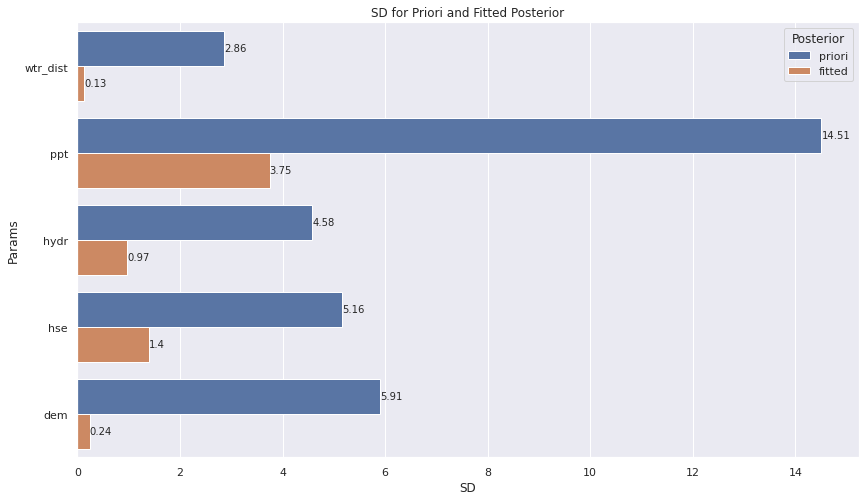

In [18]:
# Plotting
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='SD', y='Params', hue='Posterior', data=sig_df, ci=None, orient='h')
ax.set_title('SD for Priori and Fitted Posterior')
for i in ax.containers:
    ax.bar_label(i,)

In [121]:
# Results to generate WAIC analysis
l2_waic, l2_dse, l1_waic, l1_dse, l0_waic, l0_dse

(array([425.57453829, 437.53190409, 423.68593133, 428.07733997,
        424.52643314, 422.4609631 ]),
 array([6.57669501, 8.74024351, 6.48005015, 2.50249593, 1.60814925,
        0.        ]),
 array([429.92861213, 436.92400401, 426.43309506, 497.5509677 ,
        499.66504907, 490.90752567]),
 array([6.91881458, 8.67116067, 6.59393354, 7.42615499, 7.39175237,
        7.14546701]),
 array([884.63388024, 896.20055168, 885.99018324, 887.04108653,
        875.73754543, 877.07921543]),
 array([26.42228274, 26.42497784, 26.45030561, 26.53013748, 27.12444846,
        27.19539653]))